Introduction to Facebook Analysis

In today's digital age, effective social media management is paramount for businesses and organizations looking to connect with their audience and enhance their online presence. Harnessing the power of platforms like Facebook, understanding audience behavior, and optimizing content strategy can be a game-changer. To this end, I embarked on a comprehensive social media analysis, primarily focusing on Facebook.

Our analysis delves into a plethora of facets, from dissecting engagement metrics to exploring content types and evaluating time-based trends. By harnessing data-driven insights, we aim to provide a clear picture of what works best on this social media platform and offer actionable recommendations for maximizing engagement, reach, and overall impact.

The journey begins with an examination of key engagement metrics, such as likes, comments, and shares, to gauge the audience's interaction with posts. We dive deep into content types, unraveling the performance of text, photo, and video content, and shed light on which resonates most with the audience.

Time is a critical dimension in social media strategy, and our analysis dissects how engagement and reach vary throughout the day and across days of the week. Insights into peak engagement times and high-impact days can inform scheduling strategies for optimal results.

Moreover, we explore monthly trends, unearthing patterns in user activity and content performance over the course of a year. By identifying peaks and troughs in engagement, we aim to help tailor content strategy to capitalize on seasonal variations.

Yearly trends provide an overarching view of how key metrics have evolved over time. We examine the impact of significant events or shifts in user behavior, such as the influence of external factors like the COVID-19 pandemic on social media engagement.

This multifaceted social media analysis combines quantitative data with qualitative insights, offering a holistic understanding of the bank's Facebook presence. It equips decision-makers with the knowledge to refine content strategies, optimize posting schedules, and ultimately enhance their social media impact.

Join me on this data-driven journey as wI navigate through the vast landscape of social media analytics, unearthing valuable insights that can transform your social media strategy.



In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = 'C:\\Users\\HP\\Documents\\WORKSPACE\\Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.xls'
df = pd.read_excel(data)

In [3]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

In [226]:
#exploring the data
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,12/17/2022 5:08 pm,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",https://www.facebook.com/StanbicIBTC/videos/53...,207378.0,207378.0,5.0,207373.0,0.0,1147.0,1147.0,0.0,206231.0,206231.0,0.0,207378.0,207378.0,4.0,213627.0,0.0,1112.0,0.0,NaN,0.0049,0.0049,1024.0,179.0,176.0,NaN,3.0,0.0,0.0,0.0,0.0,59.0,2.0,NaN,0.0,NaN,784.0,784.0,NaN,NaN,NaN,NaN,NaN,52.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,792.0,51.0,231.0,177.0,53.0,2.0,0.0,587.0,NaN,NaN,50.0,577.0,13.0,NaN,NaN,NaN,982.0,NaN,982.0,0.0,917.0,917.0,0.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,960.0,22.0,634.0,348.0,270.0,270.0,0.0,261.0,9.0,186.0,84.0,897.0,0.0,63.0,2.0,19.0,19.0,0.0,84.07,3.47,14824.6,14824.6,0.0,975.0,975.0,0.0,263.0,62.0,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2019-04-05 10:01:00,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.c

In [227]:
df.tail()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
9798,2013-01-02 13:24:00,253788558082460_282819078512741,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/media/set/?set=a.2828...,NaN,https://www.facebook.com/StanbicIBTC/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9799,1/17/2013 5:08 pm,253788558082460_271983219596327,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,NaN,https://www.facebook.com/StanbicIBTC/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Columns: 147 entries, Date to Tags
dtypes: float64(136), object(11)
memory usage: 11.0+ MB


In [229]:
df.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile', 'Sent by', 'Link', 'Post', 'Linked Content',
       ...
       'Video Removed from Playlists', 'Annotation Impressions', 'Annotation Clickable Impressions', 'Annotation Closable Impressions', 'Annotation Closes', 'Card Impressions', 'Card Teaser Impressions', 'Card Teaser Clicks', 'Poll Votes', 'Tags'], dtype='object', length=147)

In [4]:
# List of chosen features
chosen_features = [
    'Date','Content Type','Negative Feedback', 'Post', 'Impressions', 
    'Engagements', 'Reactions', 'Comments', 'Shares', 'Click-Through Rate', 
    'Non-fan Impressions','Reach','Viral Reach','Non-viral Reach','Engaged Fans', 
    'Users Talking About This','Unique Post Clicks','Unique Reactions', 'Unique Comments', 'Unique Shares', 
    'Fan Reach','Engaged Users','Viral Impressions','Non-viral Impressions', 
    'Fan Organic Impressions','Post Clicks (All)','Love Reactions','Haha Reactions','Wow Reactions','Sad Reactions','Angry Reactions']

In [5]:
# Select the chosen features from the DataFrame
df1 = df[chosen_features]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      9803 non-null   object 
 1   Content Type              9803 non-null   object 
 2   Negative Feedback         8893 non-null   float64
 3   Post                      9553 non-null   object 
 4   Impressions               8893 non-null   float64
 5   Engagements               8893 non-null   float64
 6   Reactions                 8893 non-null   float64
 7   Comments                  8893 non-null   float64
 8   Shares                    8893 non-null   float64
 9   Click-Through Rate        8893 non-null   float64
 10  Non-fan Impressions       8893 non-null   float64
 11  Reach                     8893 non-null   float64
 12  Viral Reach               8893 non-null   float64
 13  Non-viral Reach           8893 non-null   float64
 14  Engaged 

In [7]:
#checking for missing values in the selected features
df1.isnull().sum()

Date                          0
Content Type                  0
Negative Feedback           910
Post                        250
Impressions                 910
Engagements                 910
Reactions                   910
Comments                    910
Shares                      910
Click-Through Rate          910
Non-fan Impressions         910
Reach                       910
Viral Reach                 910
Non-viral Reach             910
Engaged Fans                910
Users Talking About This    910
Unique Post Clicks          910
Unique Reactions            910
Unique Comments             910
Unique Shares               910
Fan Reach                   910
Engaged Users               910
Viral Impressions           910
Non-viral Impressions       910
Fan Organic Impressions     910
Post Clicks (All)           910
Love Reactions              910
Haha Reactions              910
Wow Reactions               910
Sad Reactions               910
Angry Reactions             910
dtype: i

In [8]:
#checking the descriptive statistics of the data to ascertain the method to handle the missing values
df1.describe()

,Negative Feedback,Impressions,Engagements,Reactions,Comments,Shares,Click-Through Rate,Non-fan Impressions,Reach,Viral Reach,Non-viral Reach,Engaged Fans,Users Talking About This,Unique Post Clicks,Unique Reactions,Unique Comments,Unique Shares,Fan Reach,Engaged Users,Viral Impressions,Non-viral Impressions,Fan Organic Impressions,Post Clicks (All),Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions
count,8893.000000,8893.000000,8893.000000,8893.00000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000
mean,0.327561,5857.725177,231.683234,91.88699,20.538738,8.381311,0.001772,938.261779,5210.642078,455.310019,4773.610480,115.994040,69.905544,83.112673,58.733723,11.325424,5.344091,4442.161026,139.400427,623.155066,5234.547959,4919.463398,110.876195,2.305746,0.158102,0.129203,0.033959,0.151467
std,0.775294,7295.418176,1107.892858,1014.84987,59.085734,19.115478,0.067465,3067.161092,6327.918115,1129.762366,5758.010293,203.924973,112.712558,189.606940,97.310893,33.562968,10.460694,5014.352672,244.943697,1650.699781,6341.260127,5747.002971,270.738336,16.024033,1.603587,2.320830,0.226888,0.669274
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2019.000000,56.000000,23.00000,2.000000,0.000000,0.000000,263.000000,1875.000000,4.000000,1725.000000,29.000000,20.000000,16.000000,17.000000,1.000000,0.000000,1512.000000,37.000000,5.000000,1888.000000,1678.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4082.000000,107.000000,39.00000,8.000000,2.000000,0.000000,466.000000,3771.000000,83.000000,3488.000000,61.000000,39.000000,38.000000,33.000000,5.000000,1.000000,3201.000000,73.000000,88.000000,3784.000000,3483.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,7376.000000,220.000000,76.00000,18.000000,10.000000,0.000000,849.000000,6534.000000,449.000000,6099.000000,129.000000,78.000000,83.000000,65.000000,10.000000,6.000000,5699.000000,154.000000,544.000000,6564.000000,6207.000000,108.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,207378.000000,72474.000000,70484.00000,1552.000000,588.000000,5.000000,206231.000000,207378.000000,24829.000000,213627.000000,4142.000000,1892.000000,4227.000000,1806.000000,955.000000,230.000000,76764.000000,4514.000000,35816.000000,207373.000000,103287.000000,5989.000000,471.000000,70.000000,163.000000,6.000000,21.000000


In [9]:
#Replace missing values with the median for numerical columns
numerical_cols = df1.select_dtypes(include=[np.number])  # Select only numerical columns
df1[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.median())

In [10]:
#checking data after treating missing values
df1.isnull().sum()

Date                          0
Content Type                  0
Negative Feedback             0
Post                        250
Impressions                   0
Engagements                   0
Reactions                     0
Comments                      0
Shares                        0
Click-Through Rate            0
Non-fan Impressions           0
Reach                         0
Viral Reach                   0
Non-viral Reach               0
Engaged Fans                  0
Users Talking About This      0
Unique Post Clicks            0
Unique Reactions              0
Unique Comments               0
Unique Shares                 0
Fan Reach                     0
Engaged Users                 0
Viral Impressions             0
Non-viral Impressions         0
Fan Organic Impressions       0
Post Clicks (All)             0
Love Reactions                0
Haha Reactions                0
Wow Reactions                 0
Sad Reactions                 0
Angry Reactions               0
dtype: i

In [11]:
# Drop rows with missing values
df1.dropna(inplace=True)

In [12]:
df1.isna().sum()

Date                        0
Content Type                0
Negative Feedback           0
Post                        0
Impressions                 0
Engagements                 0
Reactions                   0
Comments                    0
Shares                      0
Click-Through Rate          0
Non-fan Impressions         0
Reach                       0
Viral Reach                 0
Non-viral Reach             0
Engaged Fans                0
Users Talking About This    0
Unique Post Clicks          0
Unique Reactions            0
Unique Comments             0
Unique Shares               0
Fan Reach                   0
Engaged Users               0
Viral Impressions           0
Non-viral Impressions       0
Fan Organic Impressions     0
Post Clicks (All)           0
Love Reactions              0
Haha Reactions              0
Wow Reactions               0
Sad Reactions               0
Angry Reactions             0
dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9553 entries, 0 to 9797
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      9553 non-null   object 
 1   Content Type              9553 non-null   object 
 2   Negative Feedback         9553 non-null   float64
 3   Post                      9553 non-null   object 
 4   Impressions               9553 non-null   float64
 5   Engagements               9553 non-null   float64
 6   Reactions                 9553 non-null   float64
 7   Comments                  9553 non-null   float64
 8   Shares                    9553 non-null   float64
 9   Click-Through Rate        9553 non-null   float64
 10  Non-fan Impressions       9553 non-null   float64
 11  Reach                     9553 non-null   float64
 12  Viral Reach               9553 non-null   float64
 13  Non-viral Reach           9553 non-null   float64
 14  Engaged 

In [77]:
# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

In [78]:
# Create new columns for year and time
df1['Year'] = df1['Date'].dt.year
df1['Time'] = df1['Date'].dt.time

In [79]:
# Function to extract the month
def extract_month(date):
    return date.strftime('%B')  # '%B' format returns the full month name

In [80]:
# Apply the extract_month function to create a new 'Month' column
df1['Month'] = df1['Date'].apply(extract_month)

In [81]:
# Define time of the day intervals
morning_start = pd.to_datetime('06:00:00').time()
afternoon_start = pd.to_datetime('12:00:00').time()
night_start = pd.to_datetime('18:00:00').time()

# Function to categorize time of day
def categorize_time_of_day(time):
    if time < morning_start:
        return 'Night'
    elif morning_start <= time < afternoon_start:
        return 'Morning'
    elif afternoon_start <= time < night_start:
        return 'Afternoon'
    else:
        return 'Night'

# Apply the categorize_time_of_day function to create a new column
df1['Time_of_Day'] = df1['Time'].apply(categorize_time_of_day)

# Now, df1 contains a 'Time_of_Day' column with morning, afternoon, or night values

In [82]:
# Extract the day of the week and create a new column for it
df1['Day_of_Week'] = df1['Date'].dt.day_name()

In [83]:
df1.head(3)

,Date,Content Type,Negative Feedback,Post,Impressions,Engagements,Reactions,Comments,Shares,Click-Through Rate,Non-fan Impressions,Reach,Viral Reach,Non-viral Reach,Engaged Fans,Users Talking About This,Unique Post Clicks,Unique Reactions,Unique Comments,Unique Shares,Fan Reach,Engaged Users,Viral Impressions,Non-viral Impressions,Fan Organic Impressions,Post Clicks (All),Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Year,Time,Month,Time_of_Day,Day_of_Week
0,2022-12-17 17:08:00,Video,13.0,"We celebrated recently with Novare, one of our...",207378.0,1024.0,179.0,59.0,2.0,0.0,206231.0,207378.0,4.0,213627.0,51.0,231.0,587.0,177.0,53.0,2.0,1112.0,792.0,5.0,207373.0,1147.0,784.0,3.0,0.0,0.0,0.0,0.0,2022,17:08:00,December,Afternoon,Saturday
1,2019-04-05 10:01:00,Photo,10.0,N5k can get you started today. Call 01 280 126...,125784.0,5876.0,762.0,572.0,47.0,0.0,22497.0,92009.0,17238.0,76074.0,3360.0,1166.0,3412.0,762.0,413.0,47.0,76764.0,4010.0,23926.0,101858.0,103287.0,4495.0,10.0,1.0,4.0,0.0,0.0,2019,10:01:00,April,Morning,Friday
2,2020-02-06 21:00:00,Photo,5.0,Still not sure whether to invest in the FGN Bo...,89699.0,4744.0,465.0,855.0,29.0,0.0,9826.0,84347.0,8910.0,75068.0,2033.0,834.0,1948.0,446.0,423.0,28.0,74322.0,2328.0,9319.0,80380.0,79873.0,3395.0,6.0,0.0,0.0,0.0,1.0,2020,21:00:00,February,Night,Thursday


In [27]:
#descriptive statistics of the features to gain more insights
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Negative Feedback,9553.0,0.297708,0.739621,0.0,0.0,0.0,0.0,13.0
Impressions,9553.0,5712.714959,6983.721195,0.0,2301.0,4082.0,6945.0,207378.0
Engagements,9553.0,220.907987,1067.973217,0.0,60.0,107.0,203.0,72474.0
Reactions,9553.0,87.415681,979.020761,0.0,24.0,39.0,70.0,70484.0
Comments,9553.0,19.474197,56.575201,0.0,3.0,8.0,17.0,1552.0
Shares,9553.0,7.866325,18.467575,0.0,1.0,2.0,9.0,588.0
Click-Through Rate,9553.0,0.001641,0.065093,0.0,0.0,0.0,0.0,5.0
Non-fan Impressions,9553.0,899.106249,2954.153064,0.0,290.0,466.0,789.0,206231.0
Reach,9553.0,5096.316026,6047.396107,0.0,2149.0,3771.0,6181.0,207378.0
Viral Reach,9553.0,422.873338,1082.444702,0.0,7.0,83.0,385.0,24829.0


Negative Feedback:
Mean: 0.298
Std: 0.740
Min: 0.0
Max: 13.0
Interpretation: The average negative feedback received per post is approximately 0.298, with a wide range from 0 to a maximum of 13. Negative feedback may include reactions like "angry" or "dislike."

Impressions:
Mean: 5712.71
Std: 6983.72
Min: 0.0
Max: 207,378.0
Interpretation: On average, posts were displayed to users around 5,712 times. However, there is a significant variation, ranging from 0 to over 207,000 impressions.

Engagements:
Mean: 220.91
Std: 1067.97
Min: 0.0
Max: 72,474.0
Interpretation: The average engagement per post is about 220.91, including likes, comments, shares, etc. There is substantial variability, with some posts receiving no engagement and others up to 72,474 engagements.

Reactions:
Mean: 87.42
Std: 979.02
Min: 0.0
Max: 70,484.0
Interpretation: Posts received an average of 87.42 reactions (e.g., likes, loves) per post. However, there is a wide range, with some posts receiving no reactions and others over 70,000.

Comments:
Mean: 19.47
Std: 56.58
Min: 0.0
Max: 1,552.0
Interpretation: On average, posts received approximately 19.47 comments. There is considerable variation, ranging from no comments to over 1,500.

Shares:
Mean: 7.87
Std: 18.47
Min: 0.0
Max: 588.0
Interpretation: Posts were shared an average of 7.87 times. However, the number of shares varies widely, with some posts having no shares and others up to 588 shares.

Click-Through Rate (CTR):
Mean: 0.0016
Std: 0.0651
Min: 0.0
Max: 5.0
Interpretation: The average CTR is very low at 0.0016, indicating that a small percentage of users clicked on links within the posts.

Non-fan Impressions:
Mean: 899.11
Std: 2954.15
Min: 0.0
Max: 206,231.0
Interpretation: Posts received an average of 899.11 impressions from non-fans. The number of non-fan impressions varies widely, with some posts having no non-fan impressions and others up to 206,231.

Reach:
Mean: 5096.32
Std: 6047.40
Min: 0.0
Max: 207,378.0
Interpretation: The average reach per post is about 5,096.32, indicating how many unique users saw the posts. There is significant variability, ranging from 0 to over 207,000 reach.

Viral Reach:
Mean: 422.87
Std: 1082.44
Min: 0.0
Max: 24,829.0
Interpretation: Posts reached an average of 422.87 users through viral means (e.g., sharing). The viral reach varies, with some posts having no viral reach and others up to 24,829.

Non-viral Reach:
Mean: 4672.99
Std: 5506.36
Min: 0.0
Max: 213,627.0
Interpretation: Posts reached an average of 4,672.99 users through non-viral means. There is substantial variability, with some posts having no non-viral reach and others up to 213,627.

Engaged Fans:
Mean: 111.19
Std: 194.78
Min: 0.0
Max: 4,142.0
Interpretation: On average, posts engaged 111.19 fans (followers of the page). However, there is variability, with some posts not engaging any fans and others engaging up to 4,142.

Users Talking About This:
Mean: 67.08
Std: 107.26
Min: 0.0
Max: 1,892.0
Interpretation: Users talked about posts an average of 67.08 times. There is variability, with some posts having no user discussions and others up to 1,892 discussions.

Unique Post Clicks:
Mean: 79.05
Std: 180.74
Min: 0.0
Max: 4,227.0
Interpretation: Posts received an average of 79.05 unique clicks on links within the posts. The number of unique clicks varies, with some posts having none and others up to 4,227.

Unique Reactions:
Mean: 56.29
Std: 92.24
Min: 0.0
Max: 1,806.0
Interpretation: Posts received an average of 56.29 unique reactions (e.g., unique likes or loves). There is variation, with some posts having no unique reactions and others up to 1,806.

Unique Comments:
Mean: 10.81
Std: 32.31
Min: 0.0
Max: 955.0
Interpretation: On average, posts received approximately 10.81 unique comments. However, there is variability, with some posts having no unique comments and others up to 955.

Unique Shares:
Mean: 4.99
Std: 10.12
Min: 0.0
Max: 230.0
Interpretation: Posts were shared an average of 4.99 times uniquely. There is variation, with some posts having no unique shares and others up to 230.

Fan Reach:
Mean: 4343.86
Std: 4789.08
Min: 0.0
Max: 76,764.0
Interpretation: Posts reached an average of 4,343.86 fans. There is variability, with some posts not reaching any fans and others reaching up to 76,764.

Engaged Users:
Mean: 133.30
Std: 233.30
Min: 0.0
Max: 4,514.0
Interpretation: On average, 133.30 users engaged with posts (e.g., liked, commented, shared). There is variability, with some posts not engaging any users and others engaging up to 4,514.

Viral Impressions:
Mean: 577.16
Std: 1587.49
Min: 0.0
Max: 35,816.0
Interpretation: Posts received an average of 577.16 viral impressions (views due to sharing). The number of viral impressions varies, with some posts having none and others up to 35,816.

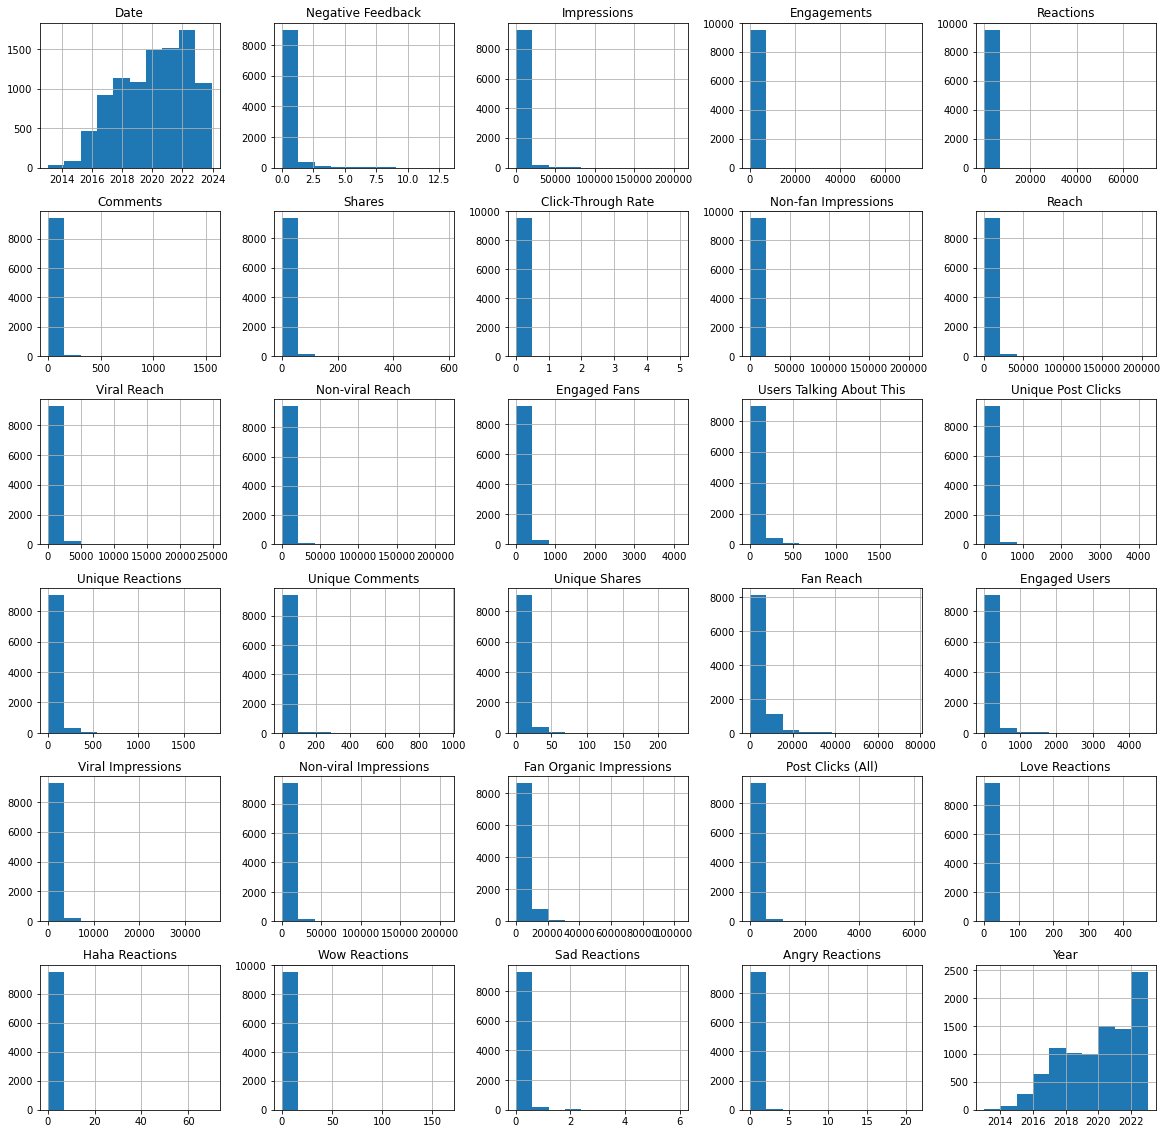

In [28]:
#chart showing the distribution of the data
df1.hist()
plt.gcf().set_size_inches(20,20)
plt.show()

Based on the distribution from the histogram, we can observe that the engagements on the post are generally skewed towards the lower end of the spectrum. This means that, in a significant portion of the posts, the number of engagements, which includes likes, comments, shares, and other interactions, tends to be relatively low.

Specifically, the histogram shows that a substantial number of posts receive a low number of engagements, as indicated by the peaks and clustering of data points on the left side of the histogram. These posts may have received minimal user interaction, such as a few likes or a couple of comments.

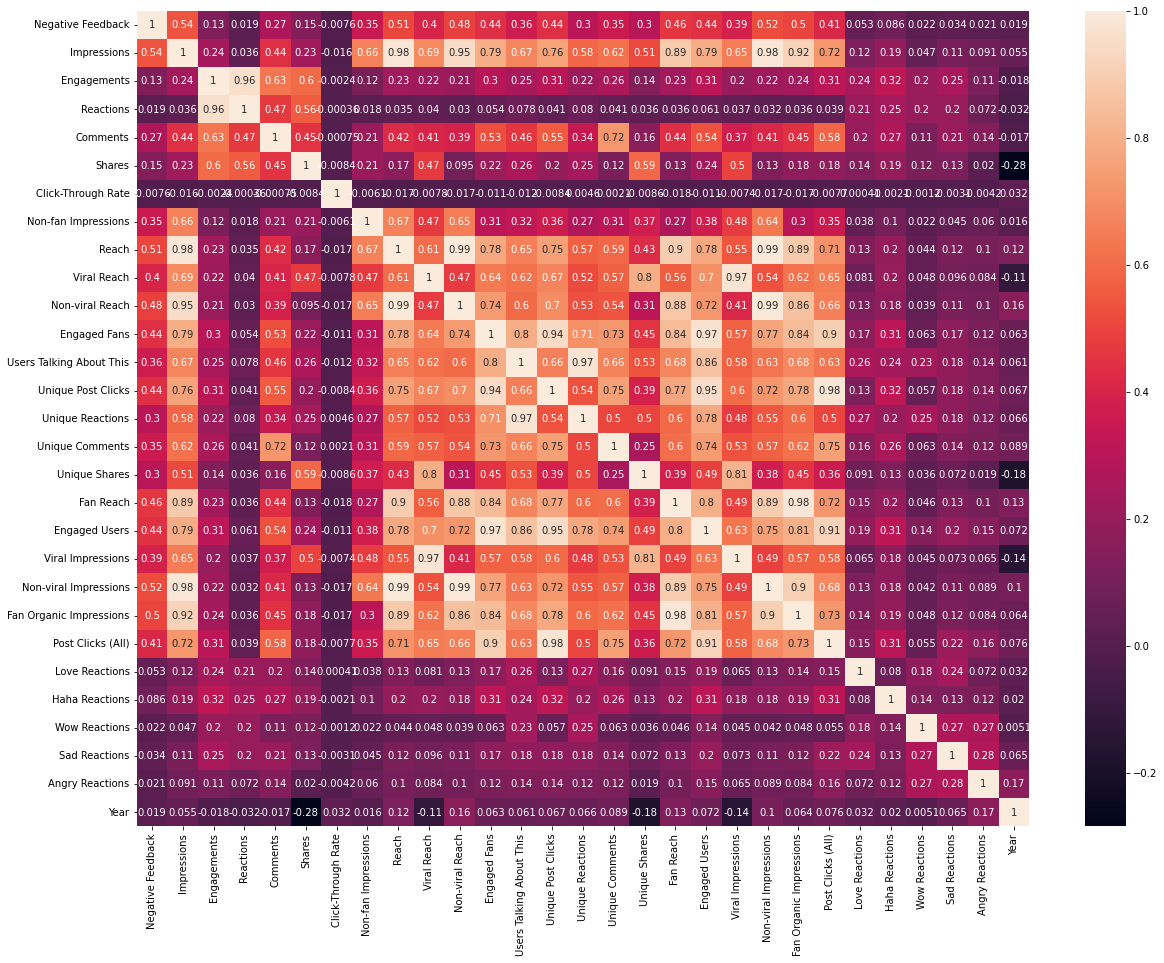

In [29]:
#heatmap showing the correlation of the variables
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(), annot = True) 
set_option ('display.width', 1000)

This heatmap provides valuable insights into the level of correlation between different variables within our dataset. It's evident that there is a range of correlation strengths among these variables, and some correlations are notably stronger than others. Let's delve into the key findings:

Negative Feedback and Impressions:

Negative feedback exhibits a moderately strong positive correlation with impressions, with a coefficient of 0.54. This suggests that posts receiving more negative feedback also tend to have a higher number of impressions. It's worth exploring the reasons behind this relationship.
Impressions and Other Metrics:

Impressions show strong positive correlations with several other metrics, including fan organic impressions, non-viral impressions, non-viral reach, and overall reach, all of which have correlation coefficients above 0.9. This indicates that posts with higher impressions tend to also generate greater organic and non-viral reach.
Engagements and Reactions:

Engagements demonstrate the highest positive correlation with reactions, with a remarkably high coefficient of 0.96. This suggests that when users engage with posts (e.g., through likes, comments, and shares), they are highly likely to react to the content.
Comments and Engagement:

Comments display a significant positive correlation with both unique comments and overall engagement, both of which have correlation coefficients exceeding 0.6. This implies that posts with more comments tend to generate higher overall engagement levels.
Shares and Other Metrics:

Shares exhibit positive correlations with viral impressions, unique shares, reactions, and engagements, all of which have correlation coefficients above 0.5. This implies that posts that are shared more frequently also tend to receive more reactions and higher overall engagement.
Reach and Related Metrics:

Reach demonstrates a strong positive correlation with several metrics, including post clicks (all), fan organic impressions, non-viral impressions, engaged users, fan reach, unique post clicks, engaged fans, non-viral reach, and impressions, all of which have correlation coefficients above 0.7. This suggests that posts with greater reach tend to lead to higher engagement and interaction with the audience.
Viral Reach and Viral Impression:

Viral reach displays a strong positive correlation with viral impressions, indicating that posts with higher viral reach also tend to generate more viral impressions.
Engaged Fans and Engagement Metrics:

Engaged fans have positive correlations with post clicks (all), fan organic impressions, fan reach, engaged users, unique post clicks (all), and users talking about this, all of which have coefficients above 0.7. This suggests that posts with a higher number of engaged fans tend to result in increased user interactions and engagement.
Unique Shares and Viral Metrics:

Unique shares exhibit a strong positive correlation with both viral impressions and viral reach, with correlation coefficients exceeding 0.8. This implies that posts with a higher number of unique shares tend to go viral more frequently.

These findings provide valuable insights into the relationships between different metrics within your dataset. Understanding these correlations can help identify key drivers of engagement and optimize your social media content strategy accordingly.

In [30]:
# Explore the distribution of different types of reactions by post type
reaction_columns = ['Likes', 'Love Reactions', 'Haha Reactions', 'Wow Reactions', 'Sad Reactions', 'Angry Reactions']

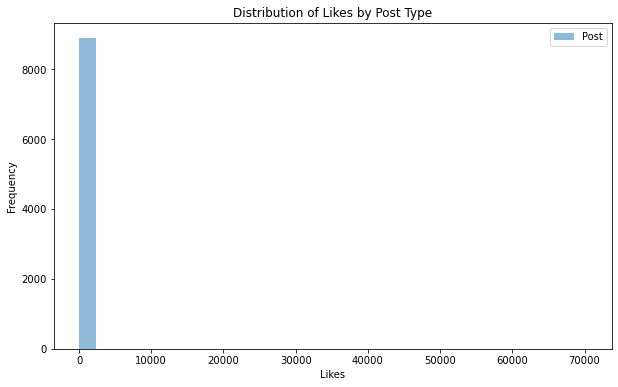

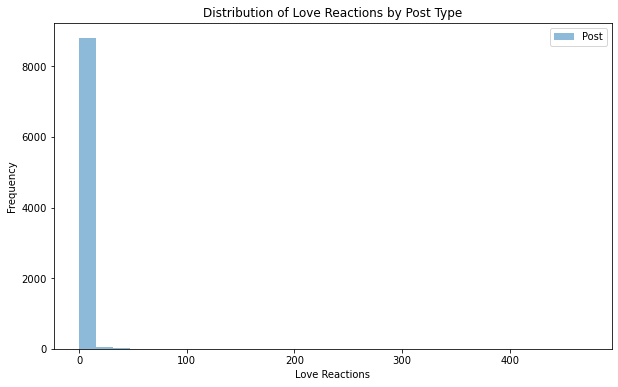

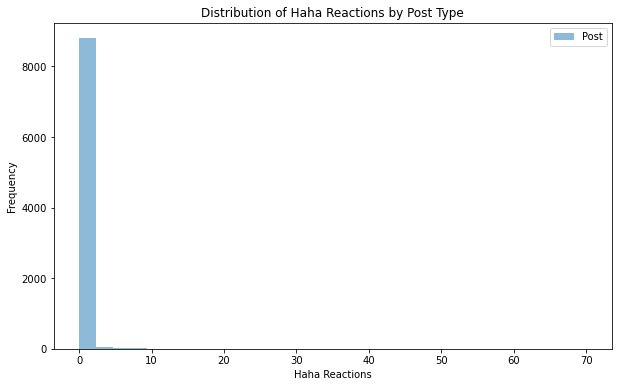

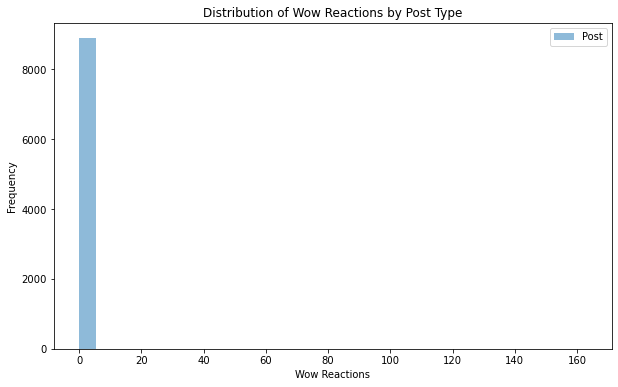

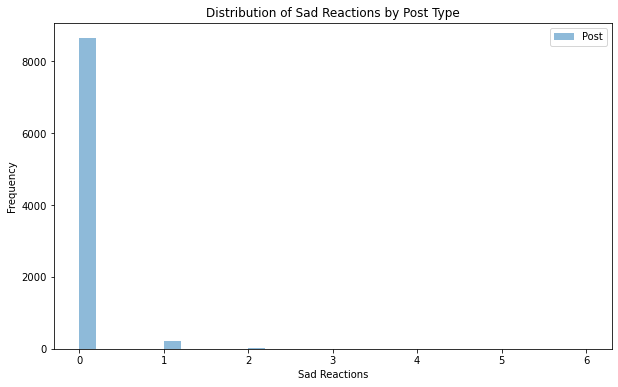

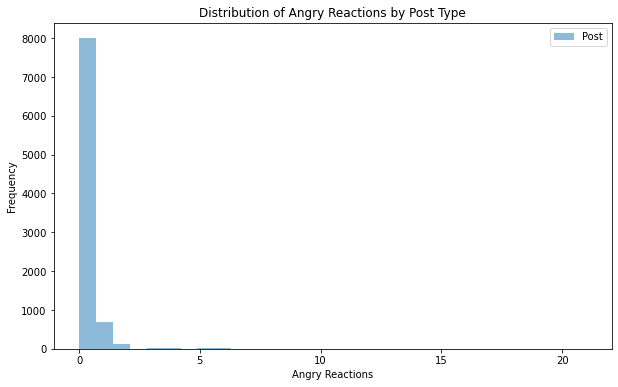

In [31]:
for reaction in reaction_columns:
    plt.figure(figsize=(10, 6))
    for post_type in df['Post Type'].unique():
        data = df[df['Post Type'] == post_type]
        plt.hist(data[reaction], bins=30, alpha=0.5, label=post_type)

    plt.title(f'Distribution of {reaction} by Post Type')
    plt.xlabel(reaction)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

From these charts, it's evident that certain types of reactions—specifically, "Love," "Sad," "Angry," and "Haha" reactions—generated some of the highest frequencies among the various types of user interactions with your Facebook posts. These reactions are essential indicators of how your audience is emotionally engaging with your content.

To gain deeper insights, it would be beneficial to further explore the specific posts that elicited these types of reactions. By analyzing these posts in greater detail, you can uncover patterns or content strategies that resonate particularly well with your audience and drive these emotional reactions.

Understanding why certain posts generate higher frequencies of these specific reactions can inform your content strategy. For example, you might discover that heartwarming or emotionally resonant stories tend to evoke "Love" reactions, while controversial topics might lead to more "Angry" reactions. Identifying these patterns can help you tailor your future content to maximize the desired emotional responses from your audience and enhance overall engagement.

In summary, these charts serve as a starting point for investigating the posts that generated these specific reactions, allowing you to refine your content strategy and create more impactful and engaging Facebook posts.

In [32]:
#exploring the top 5 post with the highest reactions
post = df.groupby('Post')[['Likes']].sum().sort_values(by=['Likes'],ascending= False)


In [33]:
post.head(5)

,Likes
Post,
Avoid carrying papers. Open a Stanbic IBTC account here https://instantaccount.stanbicibtc.com:9663/index.html \nIt's simple and easy,70244.0
You can open an account with your eyes closed. Almost. Click to open - https://instantaccount.stanbicibtc.com:9663/index.html,57786.0
Repost #MyDreamsCanBe,18709.0
Life isn‚Äôt easy. Banking should be. #NewInternetBanking will have you hooked. Visit stanbicibtcbank/internetbanking to get started.,15811.0
"With a unique gift of Mutual funds from Stanbic IBTC, you can give your loved ones more reasons to celebrate this Easter season. So go ahead and express your love through our Mutual Funds.\n \nLog on to http://bit.ly/1sRqxwX and invest in their lives today or contact us on +234 1280 5595, 0700 MUTUALFUNDS (0700 6888 2538 637), or email: mutualfunds@stanbicibtc.com",13944.0


In [34]:
#exploring the top 5 posts with love reactions
love = df.groupby('Post')[['Love Reactions']].sum().sort_values(by=['Love Reactions'],ascending= False)


In [35]:
love.head(5)

,Love Reactions
Post,
Repost #MyDreamsCanBe,859.0
Always make sure you drink enough water to stay hydrated as you #StayHome during this period. #StaySafe,471.0
"On this #WorldHealthDay, we celebrate the Nurses, Doctors and all healthcare workers working tirelessly during this COVID-19 Pandemic. Thank you for your selfless service.",394.0
"Reward4Saving Live Draw - September\n\nToday, seven people will be rewarded with N1million each and additional Seventy people will walk away with N100,000 each for saving!\nYou too can be one of them in the next Reward4Saving live draw. All you need to do is deposit N10,000 into a new or existing savings account or @easewallet account to qualify.\n\n#Reward4Saving\n#ITCANBE",389.0
"Remember to maintain the best health practices; regularly wash your hands with soap and water. \nAs they say, Health is Wealth. #StaySafe",373.0


In [36]:
#exploring the top 5 posts with sad reactions
sad = df.groupby('Post')[['Sad Reactions']].sum().sort_values(by=['Sad Reactions'],ascending= False)


In [37]:
sad.head(5)

,Sad Reactions
Post,
Repost #MyDreamsCanBe,6.0
"Reward4Saving Live Draw - September\n\nToday, seven people will be rewarded with N1million each and additional Seventy people will walk away with N100,000 each for saving!\nYou too can be one of them in the next Reward4Saving live draw. All you need to do is deposit N10,000 into a new or existing savings account or @easewallet account to qualify.\n\n#Reward4Saving\n#ITCANBE",6.0
"Reward4Saving Live Draw - October 2022\n\n70 people will get N100,000 richer today, at the #Reward4Saving October 2022 live draw. \nWill you be one? Let's find out.\nTo qualify, deposit N10,000 into a new or existing savings account or @easewallet for 30 days.\n\n#ITCANBE",5.0
You can open an account with your eyes closed. Almost. Click to open - https://instantaccount.stanbicibtc.com:9663/index.html,4.0
üôåif you got it right! #Trivia,3.0


In [38]:
#exploring the top 5 posts with angry reactions
angry = df.groupby('Post')[['Angry Reactions']].sum().sort_values(by=['Angry Reactions'],ascending= False)


In [39]:
angry.head(5)

,Angry Reactions
Post,
Repost #MyDreamsCanBe,21.0
Every human life is a precious gift to humanity. \nLet us love and respect one another. \nWe‚Äôre one Africa; let‚Äôs put aside all differences and stand together with love. \nWe #SayNoToXenophobia,20.0
"With the Stanbic IBTC Dollar Fund, be rest assured that no matter what your financial needs are, our investment product can meet those needs. \nVisit https://bit.ly/StanbicIBTCDollarFund or send a mail to assetmanagement@stanbicibtc.com to get started. \n\n#WealthWednesday\n#ITCANBE\n#GoForIt",14.0
"Reward4Saving Live Draw - January 2023\n\nLet's make money rain again as 70 people will get N100,000 richer today, at the #Reward4Saving January 2023 live draw. \nWill you be one? Let's find out.\nTo qualify, deposit N10,000 into a new or existing savings account or @easewallet for 30 days.\n\n#ITCANBE",14.0
"We sincerely apologise for any inconvenience you may be experiencing now in trying to use our banking channels. The upgrade is in progress and an update will be shared once full services are restored. In the meantime, you can reach out to us by calling 0700 909 909 909 or by sending an email to CustomerCareNigeria@stanbicibtc.com for any enquiries.",10.0


In [40]:
#exploring the top 5 posts with haha reactions
haha = df.groupby('Post')[['Haha Reactions']].sum().sort_values(by=['Haha Reactions'],ascending= False)


In [41]:
haha.head(5)

,Haha Reactions
Post,
"#HappenToLife with a Stanbic IBTC Pension and let us help you protect your future. For more information, please call 01 271 6000 or email pensionsolution@stanbicibtc.com #Pension #RetireWell #Future",70.0
What song tops your favourite playlist right now?,63.0
"If you were born in June, ‚Äòcut soap for us oh‚Äô! üòÑ \n #ITCANBE",63.0
Reminder: Don‚Äôt forget to deposit your old Naira notes at any of our branches. You have five days to go! What are you waiting for?,62.0
You can open an account with your eyes closed. Almost. Click to open - https://instantaccount.stanbicibtc.com:9663/index.html,29.0


Negative Feedback Analysis

In [42]:
#exploring the top 5 posts with negative feedback
negative = df1.groupby('Post')[['Negative Feedback']].sum().sort_values(by=['Negative Feedback'],ascending= False)

In [43]:
negative.head(5)

,Negative Feedback
Post,
Do you know the name and what this local snack is made from?,13.0
"We celebrated recently with Novare, one of our top clients on the 6th anniversary of their Novare Lekki mall opening. \n#TrustedPartner\n#ITCANBE",13.0
Repost #MyDreamsCanBe,12.0
Find the missing letters\nH_ _e _ l_ _e\n\nHint ‚Äì It‚Äôs a movie of a boy who was forgotten at home.,11.0
N5k can get you started today. Call 01 280 1266 or email assetmanagement@stanbicibtc.com.,10.0


In [44]:
#content type analysis
(df1['Content Type'].value_counts())

Photo    8118
Video     942
Text      325
Link      168
Name: Content Type, dtype: int64

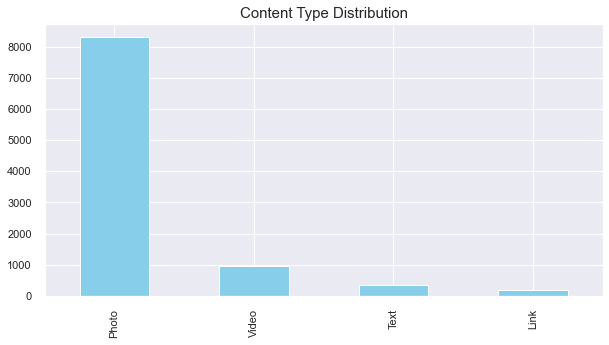

In [45]:
plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.figure(figsize = (10, 5))
plt.title('Content Type Distribution', fontsize = 15)
df['Content Type'].value_counts()[:5].plot(kind='bar', color='skyblue')
plt.show()

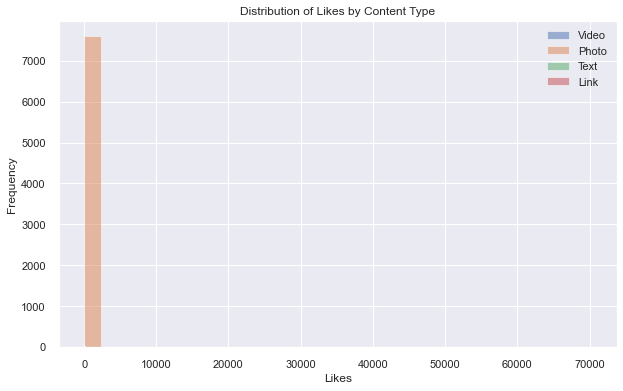

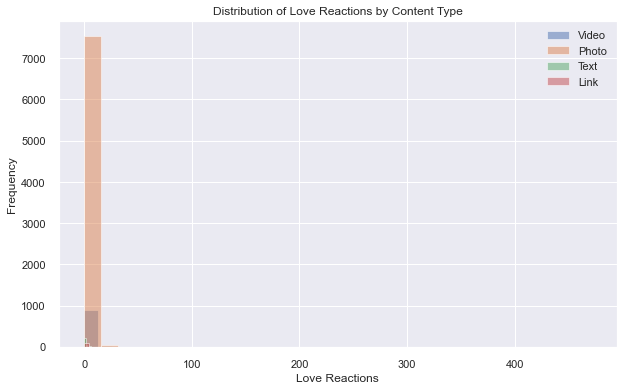

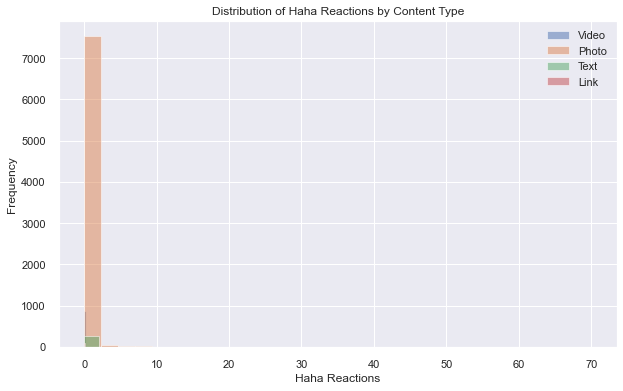

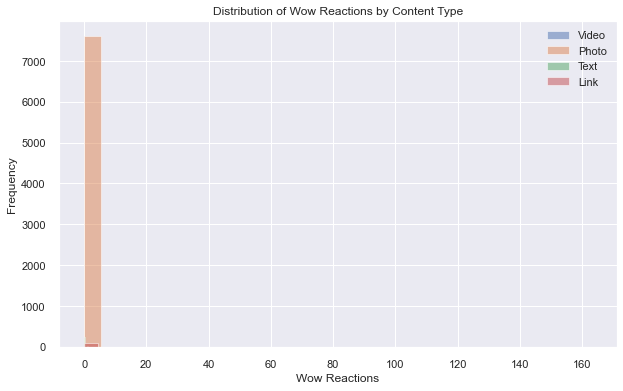

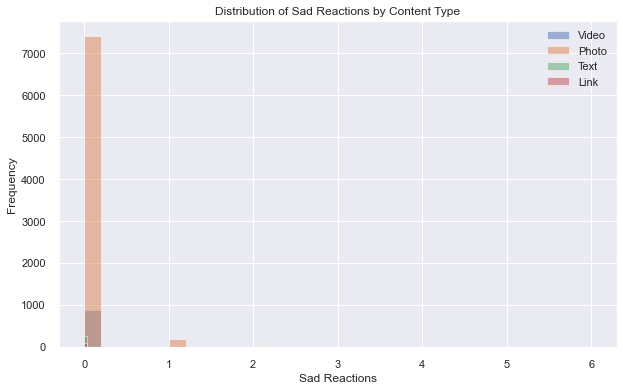

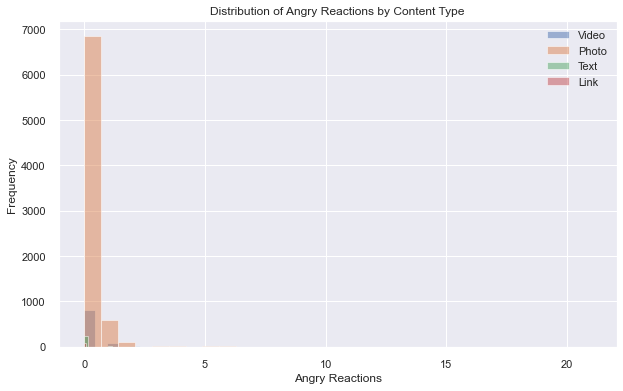

In [46]:
# Explore the distribution of different types of reactions by content type
for reaction in reaction_columns:
    plt.figure(figsize=(10, 6))
    for content_type in df['Content Type'].unique():
        data = df[df['Content Type'] == content_type]
        plt.hist(data[reaction], bins=30, alpha=0.5, label=content_type)

    plt.title(f'Distribution of {reaction} by Content Type')
    plt.xlabel(reaction)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

The analysis of content types reveals a notable trend: Facebook posts featuring photos consistently attract the highest levels of user engagement, including various types of reactions. This observation aligns with the composition of the dataset, where a significant proportion of the posts consist of photos. In light of these findings, it becomes apparent that incorporating visual elements, especially photos, into your content strategy can be a potent tool for enhancing user engagement on Facebook. This approach not only leverages the dataset's existing composition but also aligns with the broader trend of visual content's effectiveness in captivating and connecting with online audiences.
    

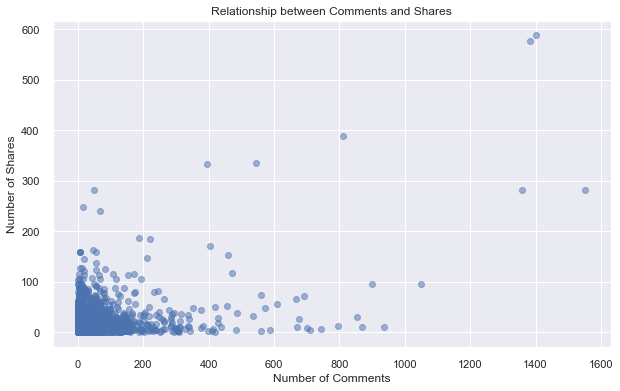

In [47]:
# Investigate the relationship between comments, shares, and engagement
plt.figure(figsize=(10, 6))

# Scatter plot of comments vs. shares
plt.scatter(df1['Comments'], df1['Shares'], alpha=0.5)
plt.title('Relationship between Comments and Shares')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Shares')
plt.grid(True)

In [48]:
# Calculate correlation between comments, shares, and engagement
correlation_comments_shares = df1['Comments'].corr(df1['Shares'])
correlation_comments_engagement = df1['Comments'].corr(df1['Engagements'])

In [49]:
#Print correlation coefficients
print(f'Correlation between Comments and Shares: {correlation_comments_shares}')
print(f'Correlation between Comments and Engagement: {correlation_comments_engagement}')

Correlation between Comments and Shares: 0.4513040229288868
Correlation between Comments and Engagement: 0.6301812432633006


The correlation coefficients between comments and shares, as well as comments and engagement, provide valuable insights into the relationships among these variables:

Correlation between Comments and Shares (0.451):

A positive correlation coefficient of approximately 0.451 suggests a moderate positive relationship between the number of comments on Facebook posts and the number of shares those posts receive.
This means that, in general, when a post attracts a higher number of comments, it is more likely to also have a higher number of shares. These two engagement metrics are positively associated.
A potential interpretation is that engaging and discussion-provoking content tends to be shared more frequently. Users may comment on a post to express their opinions or engage in discussions, and this, in turn, may lead to more shares as others share the content to participate in the conversation.
Correlation between Comments and Engagement (0.630):

A stronger positive correlation coefficient of approximately 0.630 indicates a relatively strong positive relationship between the number of comments on Facebook posts and the overall engagement those posts receive.
This means that posts with a higher number of comments tend to have higher overall engagement levels, which includes reactions, shares, and other forms of interaction.
The interpretation here is that comments play a significant role in driving overall engagement. When users actively comment on a post, it tends to attract more reactions, shares, and other forms of engagement. This could be because comments often signify a deeper level of engagement and interaction with the content.
In summary, both correlations highlight the importance of user comments in fostering engagement on Facebook posts. Posts that encourage meaningful discussions and receive a higher number of comments are likely to also see increased shares and overall engagement. These insights can inform your content strategy, emphasizing the value of encouraging user participation and conversations within your Facebook posts to boost their reach and impact.

# Time analysis

In [50]:
df1.head(3)

,Date,Content Type,Negative Feedback,Post,Impressions,Engagements,Reactions,Comments,Shares,Click-Through Rate,Non-fan Impressions,Reach,Viral Reach,Non-viral Reach,Engaged Fans,Users Talking About This,Unique Post Clicks,Unique Reactions,Unique Comments,Unique Shares,Fan Reach,Engaged Users,Viral Impressions,Non-viral Impressions,Fan Organic Impressions,Post Clicks (All),Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Year,Time,Month,Time_of_Day,Day_of_Week
0,2022-12-17 17:08:00,Video,13.0,"We celebrated recently with Novare, one of our...",207378.0,1024.0,179.0,59.0,2.0,0.0,206231.0,207378.0,4.0,213627.0,51.0,231.0,587.0,177.0,53.0,2.0,1112.0,792.0,5.0,207373.0,1147.0,784.0,3.0,0.0,0.0,0.0,0.0,2022,17:08:00,December,Afternoon,Saturday
1,2019-04-05 10:01:00,Photo,10.0,N5k can get you started today. Call 01 280 126...,125784.0,5876.0,762.0,572.0,47.0,0.0,22497.0,92009.0,17238.0,76074.0,3360.0,1166.0,3412.0,762.0,413.0,47.0,76764.0,4010.0,23926.0,101858.0,103287.0,4495.0,10.0,1.0,4.0,0.0,0.0,2019,10:01:00,April,Morning,Friday
2,2020-02-06 21:00:00,Photo,5.0,Still not sure whether to invest in the FGN Bo...,89699.0,4744.0,465.0,855.0,29.0,0.0,9826.0,84347.0,8910.0,75068.0,2033.0,834.0,1948.0,446.0,423.0,28.0,74322.0,2328.0,9319.0,80380.0,79873.0,3395.0,6.0,0.0,0.0,0.0,1.0,2020,21:00:00,February,Night,Thursday


In [84]:
# Extract the hour of the day and create a new column for it
df1['Hour_of_Day'] = df1['Date'].dt.hour

In [85]:
df1.head(2)

,Date,Content Type,Negative Feedback,Post,Impressions,Engagements,Reactions,Comments,Shares,Click-Through Rate,Non-fan Impressions,Reach,Viral Reach,Non-viral Reach,Engaged Fans,Users Talking About This,Unique Post Clicks,Unique Reactions,Unique Comments,Unique Shares,Fan Reach,Engaged Users,Viral Impressions,Non-viral Impressions,Fan Organic Impressions,Post Clicks (All),Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Year,Time,Month,Time_of_Day,Day_of_Week,Hour_of_Day
0,2022-12-17 17:08:00,Video,13.0,"We celebrated recently with Novare, one of our...",207378.0,1024.0,179.0,59.0,2.0,0.0,206231.0,207378.0,4.0,213627.0,51.0,231.0,587.0,177.0,53.0,2.0,1112.0,792.0,5.0,207373.0,1147.0,784.0,3.0,0.0,0.0,0.0,0.0,2022,17:08:00,December,Afternoon,Saturday,17
1,2019-04-05 10:01:00,Photo,10.0,N5k can get you started today. Call 01 280 126...,125784.0,5876.0,762.0,572.0,47.0,0.0,22497.0,92009.0,17238.0,76074.0,3360.0,1166.0,3412.0,762.0,413.0,47.0,76764.0,4010.0,23926.0,101858.0,103287.0,4495.0,10.0,1.0,4.0,0.0,0.0,2019,10:01:00,April,Morning,Friday,10


In [86]:
# Explore engagement by day of the week
engagement_by_day = df1.groupby('Day_of_Week')['Engagements'].mean()
# Explore engagement by hour of the day
engagement_by_hour = df1.groupby('Hour_of_Day')['Engagements'].mean()

In [87]:
# Explore reach by day of the week
reach_by_day = df1.groupby('Day_of_Week')['Reach'].mean()


In [88]:
# Explore reach by hour of the day
reach_by_hour = df1.groupby('Hour_of_Day')['Reach'].mean()

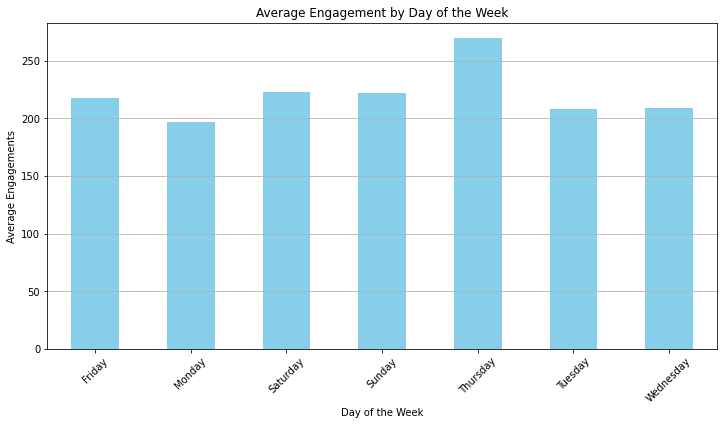

In [89]:
# Plot engagement by day of the week
plt.figure(figsize=(12, 6))
engagement_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Engagement by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

Based on the chart, which illustrates the average engagement levels across different days of the week, several key observations can be made:

Saturdays, Sundays, and Fridays: These days show consistently higher levels of engagement compared to the other days of the week. Users appear to be more active and engaged with posts during weekends and towards the end of the workweek (Friday).
Thursday: Thursday stands out as a day with a notably higher frequency of engagement compared to the earlier part of the workweek (Monday to Wednesday).Monday, Tuesday, and Wednesday: These days tend to have the lowest levels of engagement. Users appear to be less active in terms of interactions on social media during the early part of the workweek.

These observations provide valuable insights into the patterns of user engagement on different days of the week. It suggests that when planning your content strategy, you may want to consider scheduling more engaging or impactful posts during weekends and Fridays when user activity is higher. Conversely, you might adjust your strategy for Mondays, Tuesdays, and Wednesdays when engagement tends to be lower.

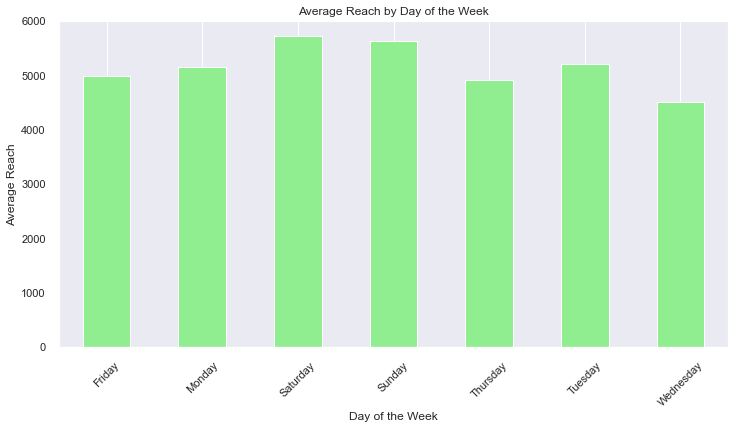

In [58]:
# Plot reach by day of the week
plt.figure(figsize=(12, 6))
reach_by_day.plot(kind='bar', color='lightgreen')
plt.title('Average Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Reach')
plt.xticks(rotation=45)
plt.grid(axis='y')

In the analysis of reach across different days of the week, it's evident that each day consistently garners a respectable level of reach. However, Saturdays and Sundays distinctly emerge as the standout performers in this regard.

Consistent Reach: The data reveals that your content maintains a commendable level of reach throughout the week, indicating that your audience remains engaged and connected with your posts on a daily basis.

Weekend Peaks: Saturdays and Sundays, in particular, demonstrate a noteworthy spike in reach. These days consistently achieve the highest reach metrics, signifying that your content tends to resonate exceptionally well with your audience over the weekend.

This observation underscores the significance of weekends in your content strategy. Leveraging the weekends, when reach is at its peak, may provide opportunities to maximize the impact of your posts, potentially reaching a broader and more receptive audience. Understanding these patterns empowers you to tailor your posting schedule to align with when your content is most likely to achieve optimal reach and engagement.


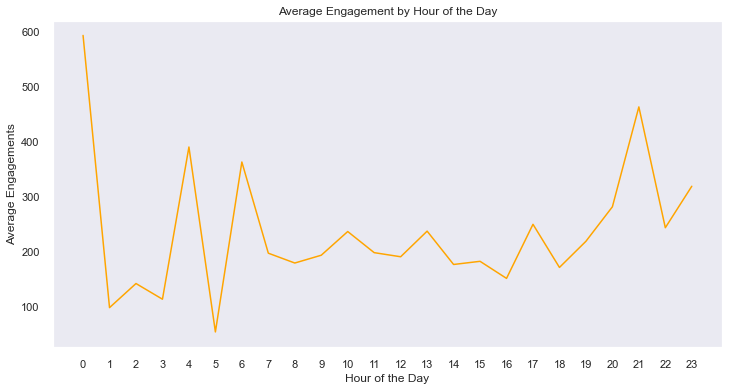

In [59]:
# Plot engagement by hour of the day
plt.figure(figsize=(12, 6))
engagement_by_hour.plot(kind='line', color='orange')
plt.title('Average Engagement by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.xticks(range(24))
plt.grid()

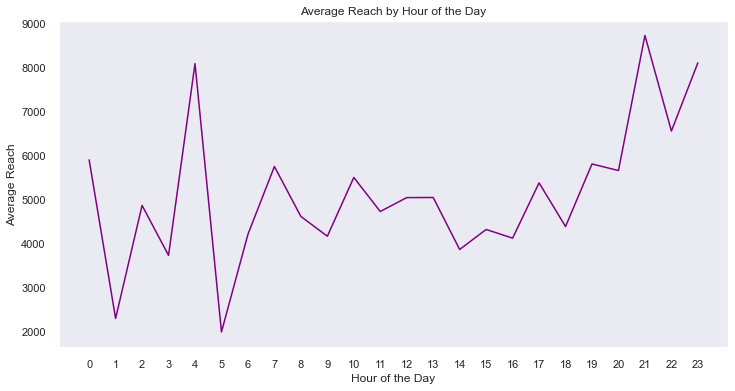

In [60]:
# Plot reach by hour of the day
plt.figure(figsize=(12, 6))
reach_by_hour.plot(kind='line', color='purple')
plt.title('Average Reach by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Reach')
plt.xticks(range(24))
plt.grid()

plt.show()

In [61]:
# Explore engagement by time of day
engagement_by_time = df1.groupby('Time_of_Day')['Engagements'].mean()

In [62]:
# Explore reach by time of day
reach_by_time = df1.groupby('Time_of_Day')['Reach'].mean()

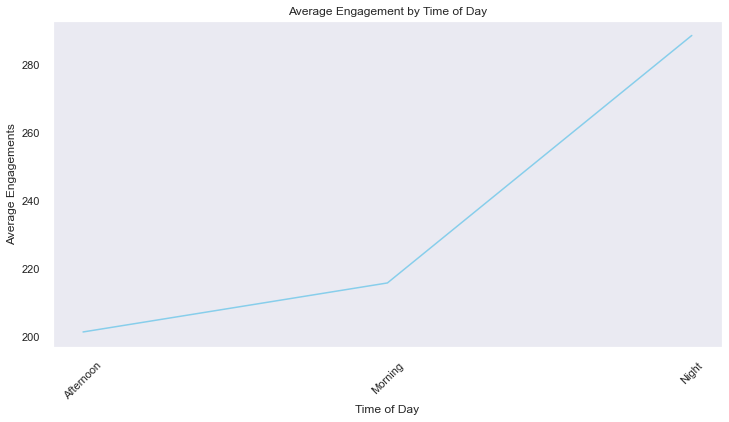

In [63]:
# Plot engagement by time of day
plt.figure(figsize=(12, 6))
engagement_by_time.plot(kind='line', color='skyblue')
plt.title('Average Engagement by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid()

The chart depicting engagement levels throughout the day offers valuable insights into the timing patterns of user interactions with contents. Here's a refined interpretation:

Morning to Night Trend: The data illustrates a clear upward trajectory in engagement starting from the morning hours and reaching its zenith during the nighttime. This suggests that users tend to become progressively more engaged with your posts as the day unfolds, with the peak occurring during the evening and nighttime periods.

Afternoon Dip: A noticeable dip in engagement is observed during the afternoon hours. This midday decline in engagement levels could be attributed to various factors, such as users being occupied with work or other activities during this time.
Understanding this daily engagement pattern can inform your content strategy. You might consider strategically scheduling your most engaging or important posts for the morning and evening periods when user activity and interest are at their highest. Conversely, during the afternoon lull, you could focus on less critical content or use this time for analysis and planning. By aligning your posting schedule with these engagement trends, you can optimize the impact of your social media efforts.

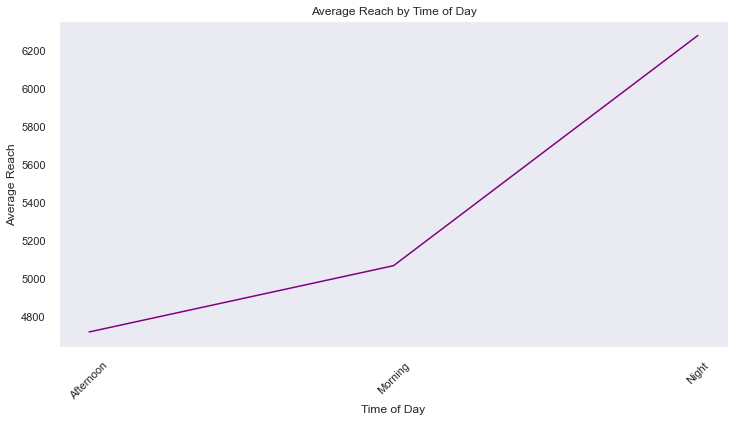

In [64]:
# Plot reach by time of day
plt.figure(figsize=(12, 6))
reach_by_time.plot(kind='line', color='purple')
plt.title('Average Reach by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Reach')
plt.xticks(rotation=45)
plt.grid()

plt.show()

The observed pattern in reach closely mirrors the engagement trends, indicating a strong correlation between the two. Here's a more refined context for this observation:

Parallel Reach and Engagement: It's evident that the reach of your posts follows a similar pattern to that of engagement, displaying a robust correlation with the hour of the day. Just like with engagement, reach experiences its peaks during the latter hours of the day.

Concurrent Peaks: The fact that both reach and engagement reach their respective zeniths during the same timeframe further emphasizes the synchronicity of user interactions with your content. This alignment suggests that your posts effectively capture and maintain the attention of your audience during these peak hours.

This synergy between reach and engagement hours highlights the importance of strategic timing. Capitalizing on these peak periods can significantly enhance the visibility and impact of your posts. By recognizing and optimizing around these trends, you can potentially amplify your social media reach and engagement to even greater heights.

In [65]:
# Explore engagement by month
engagement_by_month = df1.groupby('Month')['Engagements'].mean()


In [66]:
# Explore user activity (e.g., comments) by month
activity_by_month = df1.groupby('Month')['Comments'].mean()

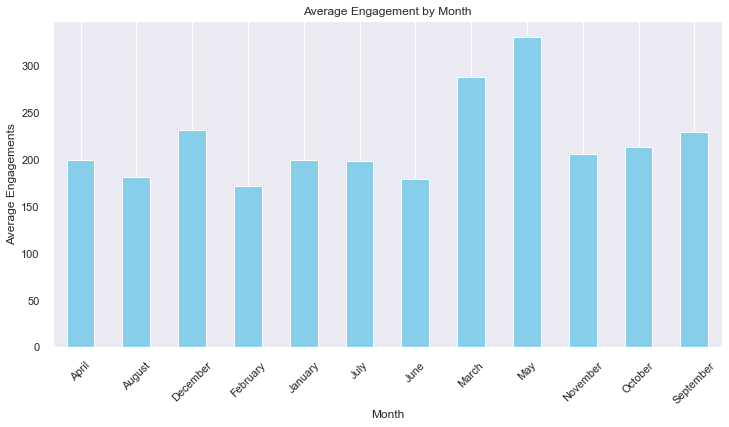

In [67]:
# Plot engagement by month
plt.figure(figsize=(12, 6))
engagement_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Engagement by Month')
plt.xlabel('Month')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The chart vividly illustrates the dynamic changes in engagement levels across different months, with distinct variations that are worth noting. Here's an enhanced context for this observation:

Monthly Engagement Dynamics: The data reveals a compelling variance in engagement levels throughout the year, with some months standing out prominently. Notably, the months of May and March emerge as clear frontrunners, characterized by a substantial surge in user interactions and engagements with your content.

Low Engagement Months: Conversely, February, August, and June exhibit a noticeable dip in engagement frequency. These months consistently record the lowest engagement metrics, indicating that user interactions with your posts tend to be comparatively subdued during these periods.

These pronounced fluctuations in engagement across the months underline the importance of seasonality in your social media strategy. Understanding these trends can guide your content planning and posting schedule. For instance, during high-engagement months like May and March, you might consider allocating more resources and focus to capitalize on the heightened user interest. Conversely, in lower-engagement months, you can strategize ways to maintain user engagement or explore alternative approaches to drive interactions with your content.

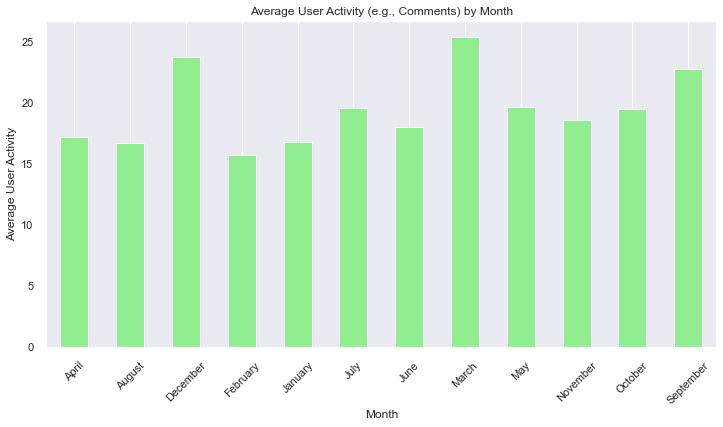

In [68]:
# Plot user activity (e.g., comments) by month
plt.figure(figsize=(12, 6))
activity_by_month.plot(kind='bar', color='lightgreen')
plt.title('Average User Activity (e.g., Comments) by Month')
plt.xlabel('Month')
plt.ylabel('Average User Activity')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

The analysis of comments across the months unveils a striking pattern of variation, with certain months clearly standing out in terms of user activity:

Monthly Comment Dynamics: The data highlights significant fluctuations in user comments throughout the year, with specific months demonstrating distinct levels of activity. Notably, the months of December, March, and September emerge as the frontrunners, characterized by a substantial surge in user comments and interaction with your content.

Lower Comment Months: In contrast, January, February, August, and April exhibit markedly lower comment frequency. These months consistently record the fewest user comments, indicating that user engagement with the content tends to be more subdued during these periods.

Understanding these comment trends across the months is instrumental in shaping your social media strategy. During high-comment months like December, March, and September, you may consider fostering and promoting discussions, as your audience appears to be more actively engaged. Conversely, in lower-comment months, exploring strategies to encourage and stimulate user interactions with your posts becomes particularly important.

In [69]:
# Define the key metrics to analyze over the years
metrics_to_analyze = ['Engagements', 'Reach', 'Comments', 'Shares']

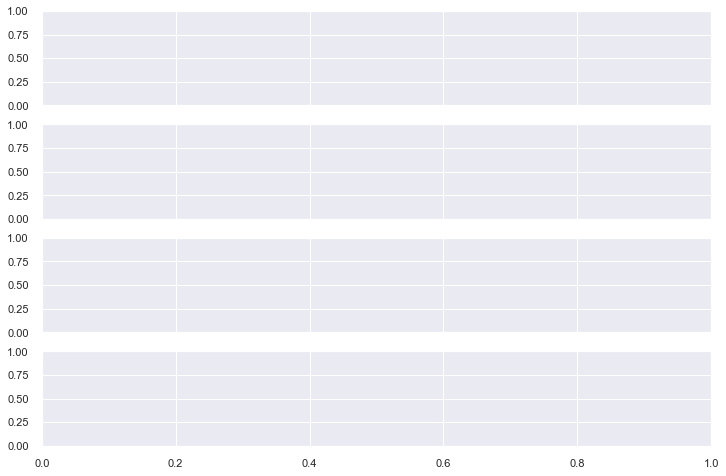

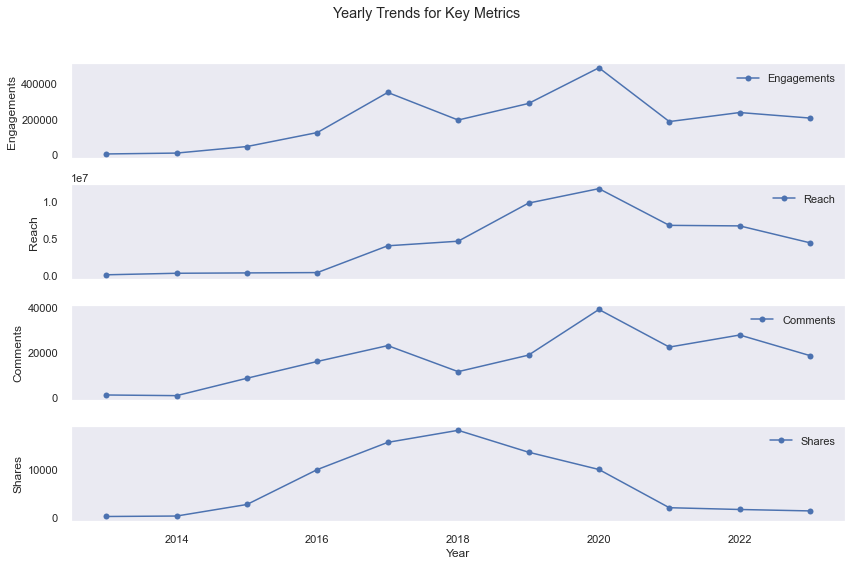

In [70]:
# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 8), sharex=True)

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 8), sharex=True)

# Plot each metric over the years
for i, metric in enumerate(metrics_to_analyze):
    ax = axes[i]
    metric_data = df1.groupby('Year')[metric].sum()
    ax.plot(metric_data.index, metric_data.values, marker='o', linestyle='-', label=metric)
    ax.set_ylabel(metric)
    ax.grid()
    ax.legend()

# Set the common x-axis label and title
plt.xlabel('Year')
plt.suptitle('Yearly Trends for Key Metrics')

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The analysis of key metrics over the years reveals compelling insights into the evolving patterns of user engagement and behavior:

Engagements: The engagement metric exhibited an intriguing trajectory. It initially showed an upward trend in 2014, experiencing consistent growth until it peaked in 2017. Subsequently, there was a decline in engagements, followed by another significant peak in 2020. This surge in 2020 raises the question of whether the global events, such as the COVID-19 pandemic, which led to people spending more time at home, played a role in driving higher engagement rates.

Reach: The reach metric displayed a distinctive pattern. It began to show noticeable growth in 2016, eventually reaching its zenith in 2020. After this peak, there was a subsequent decline in reach. This trend in reach metrics suggests a changing landscape in terms of how content is disseminated and received.

Comments: Comments on posts followed an intriguing pattern as well. They experienced an initial upward trend in 2014, reaching their first peak in 2017. Following this peak, there was a period of declining comments. However, it's noteworthy that comments surged to another peak in 2020. This dual-peak pattern in comments prompts further exploration to understand the factors influencing user interactions.

Shares: The metric of shares also underwent a notable transformation. It demonstrated an upward trend in 2014, achieving its highest point in 2018. Subsequently, there was a decline in the frequency of shares. The shifting dynamics of shares hint at changing user behaviors and preferences in sharing content.

These observations underscore the dynamic nature of user engagement and interaction over the years. Factors such as global events and changes in online behavior may have contributed to these fluctuations. Investigating the underlying drivers behind these trends can provide valuable insights for adapting your social media strategy and effectively engaging with your audience.

In [72]:
# Define the columns to analyze
columns_to_analyze = ['Content Type', 'Engagements', 'Impressions', 'Reach', 'Comments', 'Shares']


In [73]:
# Group the data by 'Content Type'
content_type_grouped = df1.groupby('Content Type')[columns_to_analyze].mean()


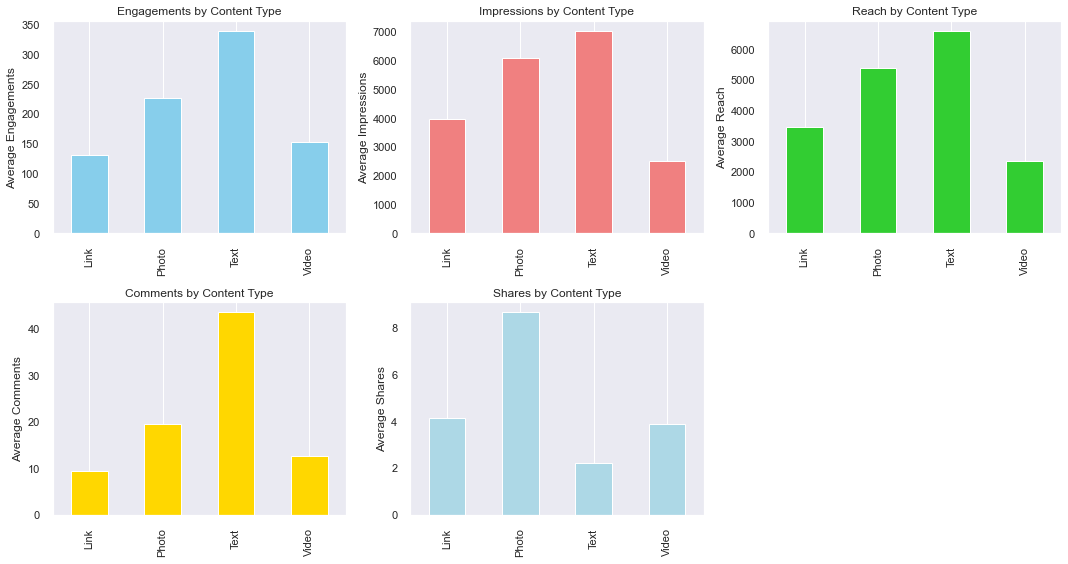

In [74]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot Engagements
content_type_grouped['Engagements'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Average Engagements')
axes[0, 0].set_title('Engagements by Content Type')
axes[0, 0].grid(axis='y')

# Plot Impressions
content_type_grouped['Impressions'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Average Impressions')
axes[0, 1].set_title('Impressions by Content Type')
axes[0, 1].grid(axis='y')

# Plot Reach
content_type_grouped['Reach'].plot(kind='bar', ax=axes[0, 2], color='limegreen')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('Average Reach')
axes[0, 2].set_title('Reach by Content Type')
axes[0, 2].grid(axis='y')

# Plot Comments
content_type_grouped['Comments'].plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Average Comments')
axes[1, 0].set_title('Comments by Content Type')
axes[1, 0].grid(axis='y')

# Plot Shares
content_type_grouped['Shares'].plot(kind='bar', ax=axes[1, 1], color='lightblue')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Average Shares')
axes[1, 1].set_title('Shares by Content Type')
axes[1, 1].grid(axis='y')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

After analyzing the performance of different content types, including text, photo, and video, across various engagement metrics, it's evident that both text and photo content consistently stood out as the most prominent categories. Whether we look at metrics such as average engagements, impressions, reach, comments, or shares, text and photo content consistently demonstrated strong performance. This insight suggests that for this social media campaign, text and photo content resonate particularly well with the audience, and leveraging these content types may be a strategic choice for maximizing engagement and reach.This context highlights the dominance of text and photo content across all analyzed metrics, emphasizing their effectiveness in engaging the audience.

In [26]:
df1.head(1)

,Date,Content Type,Negative Feedback,Post,Impressions,Engagements,Reactions,Comments,Shares,Click-Through Rate,Non-fan Impressions,Reach,Viral Reach,Non-viral Reach,Engaged Fans,Users Talking About This,Unique Post Clicks,Unique Reactions,Unique Comments,Unique Shares,Fan Reach,Engaged Users,Viral Impressions,Non-viral Impressions,Fan Organic Impressions,Post Clicks (All),Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions
0,12/17/2022 5:08 pm,Video,13.0,"We celebrated recently with Novare, one of our...",207378.0,1024.0,179.0,59.0,2.0,0.0,206231.0,207378.0,4.0,213627.0,51.0,231.0,587.0,177.0,53.0,2.0,1112.0,792.0,5.0,207373.0,1147.0,784.0,3.0,0.0,0.0,0.0,0.0


In [71]:
#create a list of variables to test the relationship against Engagements
df2 = df1[['Engagements','Comments','Shares','Click-Through Rate','Negative Feedback']]

In [72]:
df2 = df2.reset_index(drop=True)


In [73]:
# Define the dependent variable (Y) and independent variables (X)
Y = df2['Engagements']
X = df2.drop(columns=['Engagements'])

In [74]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Engagements   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     2626.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:02:04   Log-Likelihood:                -76629.
No. Observations:                9553   AIC:                         1.533e+05
Df Residuals:                    9548   BIC:                         1.533e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -109.9693      8

R-squared Value: The R-squared value of 0.524 indicates that the model explains approximately 52.4% of the variance in user engagements. In other words, the model reasonably captures the variation in engagement levels based on the selected independent variables.

Coefficients:

Comments (Positive Coefficient): The coefficient of 8.7479 for Comments suggests that an increase in the number of comments on a Facebook post is associated with a significant positive impact on user engagements. Specifically, for every additional comment, we can expect user engagements to increase by approximately 8.75 units.

Shares (Positive Coefficient): The coefficient of 22.9670 for Shares indicates that an increase in the number of shares a post receives also has a substantial positive influence on user engagements. For each additional share, user engagements are predicted to increase by about 22.97 units.

Click-Through Rate (CTR) (Insignificant Coefficient): The coefficient of 15.1782 for CTR appears to be statistically insignificant (p-value of 0.896), suggesting that changes in the click-through rate do not have a substantial impact on user engagements in this model.

Negative Feedback (Negative Coefficient): The coefficient of -67.7558 for Negative Feedback reveals a significant negative relationship. This means that an increase in negative feedback on a post is associated with a decrease in user engagements. Each unit increase in negative feedback is linked to a decrease of approximately 67.76 units in user engagements.

# Time Series Analysis for Engagements

In [214]:
df3 = df[['Date', 'Engagements']] 
df3.columns = ['ds', 'y']  # Rename columns to 'ds' and 'y' for Prophet

In [215]:
df3.head()

,ds,y
0,12/17/2022 5:08 pm,1024.0
1,2019-04-05 10:01:00,5876.0
2,2020-02-06 21:00:00,4744.0
3,2022-09-05 10:37:00,445.0
4,7/18/2021 10:00 am,4730.0


In [216]:
#convert the ds column to date format
df3['ds'] = pd.to_datetime(df3['ds']).dt.date


In [217]:
# Initialize the Prophet model
model = Prophet()

In [218]:
# Fit the model to your data
model.fit(df3)

15:54:51 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing


In [219]:
# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=365)

In [220]:
# Make predictions
forecast = model.predict(future)

In [221]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3063,2024-12-02,376.697362,-1120.269381,1738.212044,249.341023,492.417292,-59.485611,-59.485611,-59.485611,-17.814185,-17.814185,-17.814185,-41.671426,-41.671426,-41.671426,0.0,0.0,0.0,317.211752
3064,2024-12-03,376.952373,-1014.886665,1843.207836,249.399880,493.499121,-55.549163,-55.549163,-55.549163,-12.540321,-12.540321,-12.540321,-43.008842,-43.008842,-43.008842,0.0,0.0,0.0,321.403210
3065,2024-12-04,377.207384,-1211.110942,1769.859221,249.914330,494.556465,-67.575059,-67.575059,-67.575059,-23.860664,-23.860664,-23.860664,-43.714395,-43.714395,-43.714395,0.0,0.0,0.0,309.632325
3066,2024-12-05,377.462394,-1137.519827,1676.950617,249.760173,495.296869,9.071640,9.071640,9.071640,52.803324,52.803324,52.803324,-43.731685,-43.731685,-43.731685,0.0,0.0,0.0,386.534034
3067,2024-12-06,377.717405,-1087.155591,1715.723730,249.256296,496.037272,-47.916651,-47.916651,-47.916651,-4.893827,-4.893827,-4.893827,-43.022824,-43.022824,-43.022824,0.0,0.0,0.0,329.800753


In [224]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2013-01-02,136.792810
1,2013-01-15,107.185904
2,2013-01-16,98.943975
3,2013-01-17,179.647984
4,2013-02-04,179.267519
...,...,...
3063,2024-12-02,317.211752
3064,2024-12-03,321.403210
3065,2024-12-04,309.632325
3066,2024-12-05,386.534034


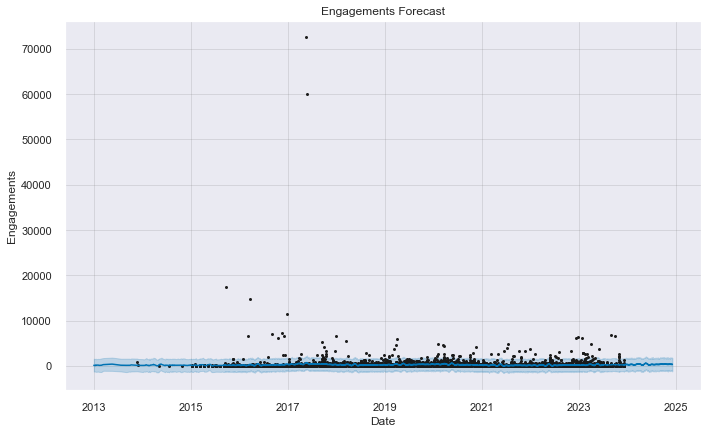

In [222]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Engagements Forecast')
plt.xlabel('Date')
plt.ylabel('Engagements')
plt.show()

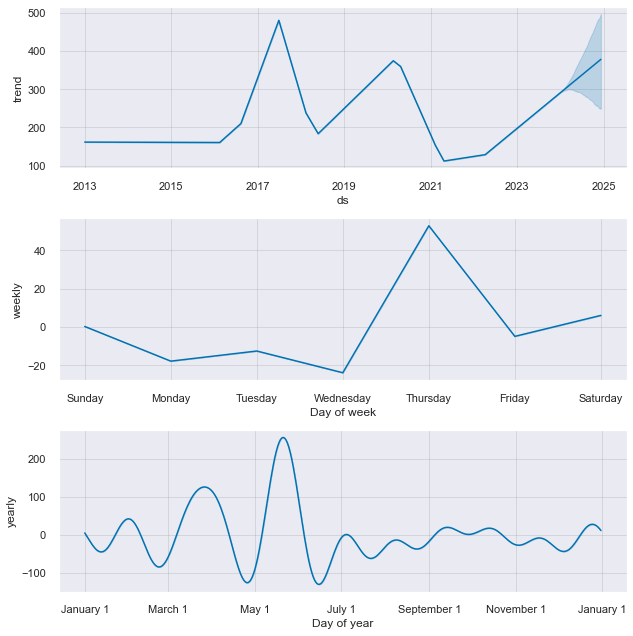

In [223]:
fig2 = model.plot_components(forecast)

# SUMMARY OF FINDINGS


The average negative feedback received per post is approximately 0.298, with a wide range from 0 to a maximum of 13. Negative feedback may include reactions like "angry" or "dislike."

On average, posts were displayed to users around 5,712 times. However, there is a significant variation, ranging from 0 to over 207,000 impressions.

The average engagement per post is about 220.91

On average, posts received approximately 19.47 comments. There is considerable variation, ranging from no comments to over 1,500

Posts were shared an average of 7.87 times. However, the number of shares varies widely, with some posts having no shares and others up to 588 shares.

The average CTR is very low at 0.0016, indicating that a small percentage of users clicked on links within the posts.

The analysis of user interactions with your Facebook posts reveals that certain emotional reactions, specifically "Love," "Sad," "Angry," and "Haha" reactions, have generated some of the highest frequencies among the various types of user engagement. These reactions offer valuable insights into how your audience emotionally connects with your content.

The analysis of content types on Facebook posts uncovers a clear trend: posts containing photos consistently garner the highest levels of user engagement, including diverse types of reactions. This pattern corresponds with the dataset's makeup, where a substantial portion of posts consists of photos. These findings highlight the effectiveness of incorporating visual elements, particularly photos, into your content strategy for boosting user engagement on Facebook. This strategy not only capitalizes on the dataset's existing content composition but also aligns with the broader industry trend emphasizing the power of visual content in capturing and resonating with online audiences.

User comments on Facebook posts show a positive correlation with both shares and overall engagement, indicating that posts with more comments tend to garner increased sharing and engagement.

User engagement on Facebook posts follows a weekly pattern, with higher levels on Saturdays, Sundays, and Fridays, while Thursdays also show increased activity. In contrast, engagement is lower on Mondays, Tuesdays, and Wednesdays, indicating a connection between user activity and the days of the week. This information can guide your content scheduling strategy, focusing on peak engagement days for more impactful posts.

The analysis of reach across the week indicates consistent reach levels every day, highlighting ongoing audience engagement. Notably, Saturdays and Sundays exhibit significant spikes in reach, emphasizing their importance in your content strategy for maximizing post impact and audience reach over the weekend.

The analysis of daily engagement patterns reveals a distinct trend: engagement levels steadily rise from morning to nighttime, peaking in the evening. However, there is a noticeable dip in engagement during the afternoon, likely due to users' focus on other activities.

The analysis of reach patterns throughout the day reveals a strong correlation with engagement trends, indicating parallel peaks during the later hours. This synchronization underscores the effectiveness of capturing audience attention during these peak periods, emphasizing the importance of strategic timing in content posting.

The analysis of monthly engagement patterns underscores significant variations throughout the year. May and March consistently stand out as high-engagement months, while February, August, and June record lower engagement levels. These findings highlight the influence of seasonality on user interactions and suggest the need for adaptive content strategies that align with these trends.

The analysis of monthly comment patterns reveals significant fluctuations in user activity. December, March, and September stand out as high-comment months, while January, February, August, and April consistently record lower comment frequencies.
Engagements: Engagements initially rose in 2014, peaking in 2017 before dropping. A significant surge occurred in 2020, possibly influenced by the COVID-19 pandemic and increased time spent at home.

Reach: Reach started growing in 2016, peaked in 2020, and declined afterward, reflecting shifts in content dissemination.
Comments: Comments followed a dual-peak pattern, with peaks in 2017 and 2020, suggesting evolving user interactions.
Shares: Shares increased until 2018, followed by a decline, reflecting changing sharing behaviors.

The analysis of content types, including text, photo, and video, consistently highlights text and photo content as top performers across various engagement metrics. Whether considering average engagements, impressions, reach, comments, or shares, these content types consistently demonstrate strong performance.

The regression analysis highlights the significant positive influence of Comments and Shares on user engagements on Facebook. Posts with more comments and shares tend to generate higher levels of engagement. Conversely, Negative Feedback has a substantial negative impact on user engagements. The Click-Through Rate, in this particular analysis, does not appear to be a significant predictor of user engagements on Facebook.

# RECOMMENDATION

Based on the summary of findings from the Facebook analysis, here are detailed recommendations to optimize your Facebook content strategy:

Leverage Emotional Reactions: Capitalize on the emotional connections your audience has with your content. Continue creating posts that elicit "Love," "Sad," "Angry," and "Haha" reactions, as these emotions drive high engagement. Craft content that resonates with these emotional triggers, encouraging users to express themselves through reactions.

Visual Content Dominance: Recognize the power of visual content, particularly photos, in driving user engagement. Given that photo posts consistently perform the best, consider incorporating more visual elements into your content strategy. Utilize high-quality images, infographics, and visually appealing graphics to capture and maintain audience attention.

Encourage Comments: Foster discussions and conversations on your Facebook posts, as user comments positively correlate with overall engagement. Encourage user-generated content, ask questions, and prompt feedback to increase comment-driven interactions. Respond promptly to comments to further stimulate engagement.

Strategic Content Scheduling: Optimize your content posting schedule based on weekly engagement patterns. Focus on Saturdays, Sundays, and Fridays when engagement is typically higher. Plan important posts, campaigns, or promotions for these peak engagement days. Use Mondays, Tuesdays, and Wednesdays for lighter content or behind-the-scenes updates.

Weekend Reach Strategy: Maximize post impact and reach by concentrating on weekends, particularly Saturdays and Sundays, when reach experiences significant spikes. Strategically time your posts to align with these high-reach periods to expand your audience and content visibility.

Time-Sensitive Posting: Recognize the daily engagement trends, with engagement steadily rising from morning to nighttime. Schedule your most critical or engaging posts for the evening when users are most active and attentive. Be mindful of the afternoon dip and adjust your content strategy accordingly.

Strategic Timing for Reach: Align the timing of your content posts with engagement trends. Focus on capturing audience attention during the evening and nighttime hours when both engagement and reach peak. Timing your posts strategically can enhance content visibility and user interactions.

Seasonal Adaptation: Acknowledge the impact of seasonality on user interactions and engagement. Develop adaptive content strategies that align with seasonal trends, emphasizing high-engagement months like May and March. Tailor your content themes, topics, and promotions to resonate with the audience during specific seasons.

Content Type Optimization: Continue prioritizing text and photo content, as they consistently perform well across various engagement metrics. Balance your content mix by featuring these content types prominently, as they resonate effectively with your audience. When using videos or other formats, ensure they complement your core text and photo content.

Focus on Reactions and Comments: Recognize the importance of "Reactions" and "Comments" in driving overall engagement. Continue to encourage user reactions and discussions, as these metrics have the most substantial positive impact on overall interactions. While "Impressions," "Shares," and "Reach" contribute positively, prioritize "Reactions" and "Comments" to maximize engagement.

Continuous Monitoring: Maintain a proactive approach to your content strategy by continually monitoring engagement metrics and adjusting your tactics based on trends. Experiment with content formats, messaging, and posting times to optimize your strategy for evolving user behavior.

Multichannel Consideration: Explore the possibility of diversifying your online presence beyond Facebook, considering other social media platforms where your audience may be active. Expanding your digital footprint can help you reach a broader audience and increase overall engagement.

By implementing these recommendations, you can refine your Facebook content strategy, enhance user engagement, and foster a vibrant and active online community.